In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.contingency_tables import Table2x2

In [84]:
# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
#HD_data

In [85]:
# To check if anything is null

HD_data.isnull().sum()    

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [86]:
#max(HD_data["PhysHlth"])
#min(HD_data["PhysHlth"])


"""
Low PhysHlth: 0-10
Mid PhysHlth: 11 - 20 
High PhysHlth: 21 - 30 

"""
bins = [0, 10, 20, float('inf')]  
labels = ['Low PhysHlth', 'Mid PhysHlth', 'High PhysHlth']


HD_data["PhysHlth_category"] = pd.cut(HD_data['PhysHlth'], bins=bins, labels=labels, right=False)

In [87]:
#print(max(HD_data["BMI"]))
#print(min(HD_data["BMI"]))
'''
Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 to 40
Severe obesity: BMI over 40
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, 40, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

In [88]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

#print(HD_data['MentHlth_category'])

In [89]:
#print(max(HD_data["Age"]))
#print(min(HD_data["Age"]))

'''
Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 5
Adult -> 36 - 65 5 - 9
Elder -> 65+ Senior 10 - 13

'''

bins = [1, 5, 10, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

In [90]:
#max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 4, 7, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

In [91]:
"""
Low Education: 1 - 2
Mid Education: 3 - 4
High Education: 5 - 6 

"""


bins = [1, 3, 5, float('inf')]  
labels = ['Low Education', 'Mid Education', 'High Education']


HD_data["Education_category"] = pd.cut(HD_data['Education'], bins=bins, labels=labels, right=False)

#print(HD_data['Education_category'])

In [92]:
# Correctly create 'Diabetes_Combined' before using it
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, 0)



# Combine columns with correct referencing
HD_data['Combined'] = HD_data['Stroke'].astype(str) + '_' + HD_data['HeartDiseaseorAttack'].astype(str) + '_' + HD_data['Diabetes'].astype(str)

# Map numerical columns to categorical labels
categorical_mappings = {
    'HighBP': {0: 'No', 1: 'Yes'},
    'HighChol': {0: 'No', 1: 'Yes'},
    'CholCheck': {0: 'No', 1: 'Yes'},
    'Smoker': {0: 'No', 1: 'Yes'},
    'PhysActivity': {0: 'No', 1: 'Yes'},
    'Fruits': {0: 'No', 1: 'Yes'},
    'Veggies': {0: 'No', 1: 'Yes'},
    'HvyAlcoholConsump': {0: 'No', 1: 'Yes'},
    'AnyHealthcare': {0: 'No', 1: 'Yes'},
    'NoDocbcCost': {0: 'No', 1: 'Yes'},
    'DiffWalk': {0: 'No', 1: 'Yes'},
    'Sex': {0: 'Male', 1: 'Female'}
}

for column, mapping in categorical_mappings.items():
    if column in HD_data.columns:
        HD_data[column] = HD_data[column].map(mapping)



In [93]:
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x='Combined', hue=column, data=HD_data, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    # Update the legend
    handles, labels = ax.get_legend_handles_labels()
    labels = ['No', 'Yes'] if set(labels) == {'0', '1'} else labels
    ax.legend(handles=handles, labels=labels, title=column, loc='upper right')
    plt.show()

# Exclude columns not needed in the dropdown
columns_to_exclude = ['Combined', 'BMI', 'MentHlth', "PhysHlth", "Age", "Income", "Education"]

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col not in columns_to_exclude]
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

In [94]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x='Combined', hue=column, data=HD_data_filter, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    handles, labels = ax.get_legend_handles_labels()
    # Adjust labels based on expected unique values in the data
    unique_labels = set(HD_data_filter[column].dropna().unique())
    if unique_labels == {'Yes', 'No'}:
        labels = ['No', 'Yes']
    ax.legend(handles=handles, labels=labels, title=column, loc='upper right')
    plt.show()

# Specify columns to exclude from the dropdown
columns_to_exclude = ['Combined', 'BMI', 'MentHlth', "PhysHlth", "Age", "Income", "Education"]  # Add more columns as needed

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col not in columns_to_exclude]
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

In [95]:
#Only Highly Interested Variable

def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'PhysActivity','Veggies',
            'DiffWalk', "BMI_category", "Age_category"]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'PhysActivity','Veggies',
            'DiffWalk', "BMI_category", "Age_category"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)







interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'PhysActivity', …

In [96]:
#Only NOT Interesting



def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['CholCheck', 'Smoker','Fruits','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', "MentHlth_category", "Income_category", "Education_category", "GenHlth"]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['CholCheck', 'Smoker','Fruits','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Sex', "MentHlth_category", "Income_category", "Education_category", "GenHlth"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)




interactive(children=(Dropdown(description='Select Variable:', options=('CholCheck', 'Smoker', 'Fruits', 'HvyA…

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# Define BMI categories
bins = [0, 18.5, 25, 30, 40, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe obesity']
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)
bmi_dummies = pd.get_dummies(HD_data['BMI_category'], prefix='BMI')
HD_data = pd.concat([HD_data, bmi_dummies], axis=1)

# Define Age categories
bins = [1, 5, 10, float('inf')]
labels = ['Young Adult', 'Adult', 'Elder']
HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)
age_dummies = pd.get_dummies(HD_data['Age_category'], prefix='Age')
HD_data = pd.concat([HD_data, age_dummies], axis=1)

# Define PhysHlth categories
bins = [0, 11, 21, 31]  # Define the bins for the categories (including 31 to cover the upper bound)
labels = ['Low PhysHlth', 'Mid PhysHlth', 'High PhysHlth']
HD_data['PhysHlth_category'] = pd.cut(HD_data['PhysHlth'], bins=bins, labels=labels, right=False)
phys_health_dummies = pd.get_dummies(HD_data['PhysHlth_category'], prefix='PhysHlth')
HD_data = pd.concat([HD_data, phys_health_dummies], axis=1)

# Define the categories for conditional entropy calculation
categories = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk']
categories.extend(bmi_dummies.columns.tolist())  # Add BMI dummy columns to the list
categories.extend(age_dummies.columns.tolist())  # Add Age dummy columns to the list
categories.extend(phys_health_dummies.columns.tolist())  # Add PhysHlth dummy columns to the list

# Function to calculate conditional entropy
def calculate_conditional_entropy(data, x, given_y):
    x_data = data[x] if x in data else None
    y_data = data[given_y] if given_y in data else None
    if x_data is not None and y_data is not None:
        joint_prob = pd.crosstab(x_data, y_data, normalize=True)
        marginal_y = y_data.value_counts(normalize=True)
        conditional_prob = joint_prob.divide(marginal_y, axis=1)
        log_conditional = np.log2(conditional_prob).replace(-np.inf, 0)
        conditional_entropy = -(joint_prob * log_conditional).sum().sum()
        return conditional_entropy
    else:
        return None

# Function to plot conditional entropy
def plot_conditional_entropy(disease_combination):
    subset = HD_data[HD_data['Combined'] == disease_combination]
    conditional_entropy_values = {var: calculate_conditional_entropy(subset, var, 'Combined') for var in categories if calculate_conditional_entropy(subset, var, 'Combined') is not None}
    sorted_conditional_entropy_values = sorted(conditional_entropy_values.items(), key=lambda item: item[1], reverse=True)

    plt.figure(figsize=(12, 10))
    plt.barh([k for k, v in sorted_conditional_entropy_values], [v for k, v in sorted_conditional_entropy_values], color='lightcoral')
    plt.xlabel('Conditional Entropy')
    plt.title(f'Conditional Entropy of Health Indicators Given {disease_combination}')
    plt.gca().invert_yaxis()
    plt.show()

# Setup for the interactive widget
disease_combinations = HD_data['Combined'].unique()
dropdown = Dropdown(options=disease_combinations, description='Select Disease Combination:')
interact(plot_conditional_entropy, disease_combination=dropdown)


interactive(children=(Dropdown(description='Select Disease Combination:', options=('0_0_0', '0_1_1', '0_0_1', …

<function __main__.plot_conditional_entropy(disease_combination)>

In [98]:



# Defined variables for entropy calculation
categories = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 'BMI_category', 'Age_category', 
              'PhysHlth_category']

# Calculate entropy for the selected variables
def calculate_entropy(data, variable):
    counts = data[variable].value_counts(normalize=True, sort=False)
    return entropy(counts, base=np.e) if not counts.empty else 0
    
entropy_values = {var: calculate_entropy(HD_data, var) for var in categories}


def plot_compared_entropy(bmi_cat, age_cat, phys_health_cat):
    plt.figure(figsize=(12, 8))

    # Filter entropy values to include only selected categories
    filtered_entropy = {key: entropy_values[key] for key in categories}

    # Plotting
    names = list(filtered_entropy.keys())  # Categories names
    values = list(filtered_entropy.values())  # Corresponding entropy values

    # Adding selected categories with their proportions (for dynamic visualization)
    names += ['Selected BMI Category: ' + bmi_cat, 'Selected Age Category: ' + age_cat, 'Selected PhysHlth Category: ' + phys_health_cat]
    values += [HD_data[HD_data['BMI_category'] == bmi_cat]['BMI_category'].count() / len(HD_data),
               HD_data[HD_data['Age_category'] == age_cat]['Age_category'].count() / len(HD_data),
               HD_data[HD_data['PhysHlth_category'] == phys_health_cat]['PhysHlth_category'].count() / len(HD_data)]

    # Sort by values for better visualization
    names, values = zip(*sorted(zip(names, values), key=lambda x: x[1], reverse=True))

    plt.barh(names, values, color='skyblue')
    plt.xlabel('Proportion / Entropy')
    plt.title('Entropy and Proportion of Selected Health Indicators')
    plt.gca().invert_yaxis()  # Highest values at the top
    plt.show()

# Widgets for interactive selection
bmi_dropdown = widgets.Dropdown(
    options=HD_data['BMI_category'].unique().tolist(),
    description='BMI Category:'
)

age_dropdown = widgets.Dropdown(
    options=HD_data['Age_category'].unique().tolist(),
    description='Age Category:'
)

phys_health_dropdown = widgets.Dropdown(
    options=HD_data['PhysHlth_category'].unique().tolist(),
    description='Physical Health Category:'
)

widgets.interact(plot_compared_entropy, bmi_cat=bmi_dropdown, age_cat=age_dropdown, phys_health_cat=phys_health_dropdown)

interactive(children=(Dropdown(description='BMI Category:', options=('Severe obesity', 'Overweight', 'Normal w…

<function __main__.plot_compared_entropy(bmi_cat, age_cat, phys_health_cat)>

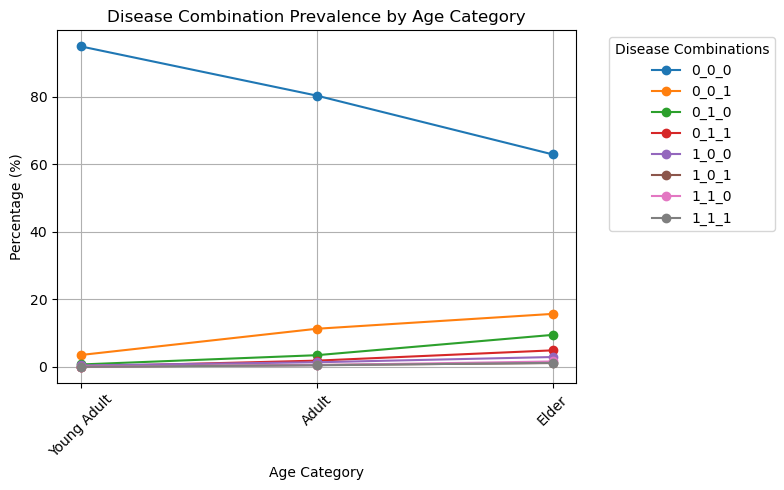

In [99]:
disease_counts = HD_data.groupby(['Age_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each age category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100


plt.figure(figsize=(8, 5))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

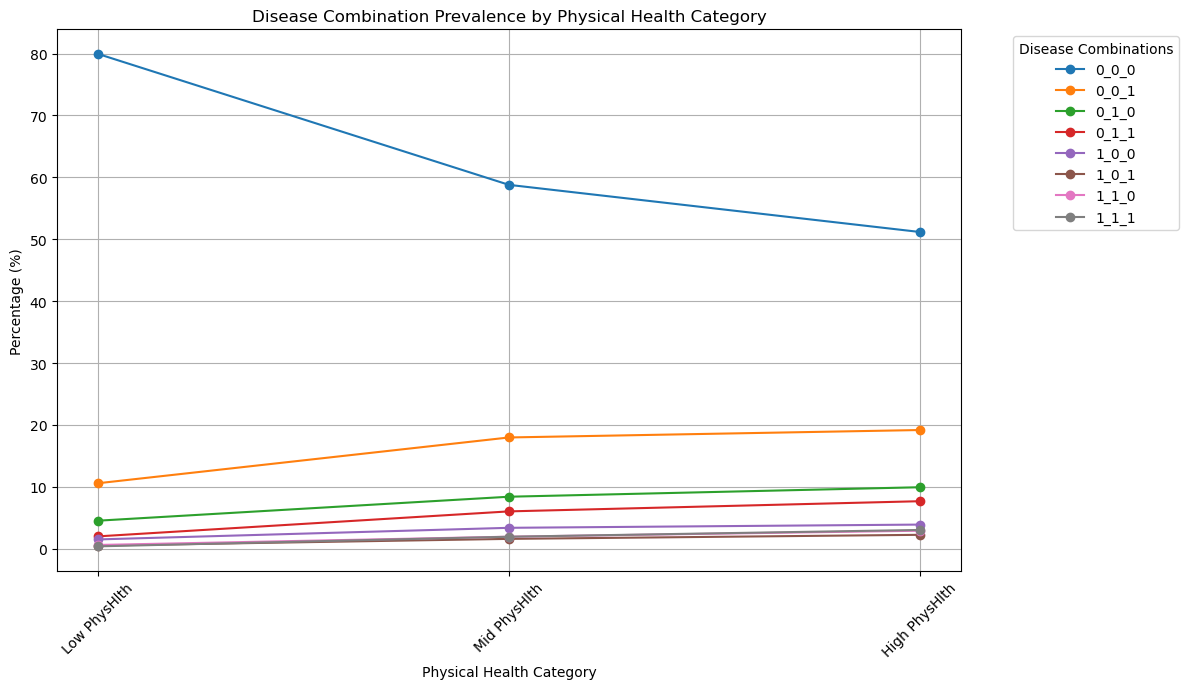

Combined               0_0_0      0_0_1     0_1_0     0_1_1     1_0_0  \
PhysHlth_category                                                       
Low PhysHlth       79.933338  10.575248  4.523651  1.989841  1.496940   
Mid PhysHlth       58.782873  17.970330  8.395145  6.026635  3.371544   
High PhysHlth      51.168785  19.171629  9.928006  7.670429  3.892987   

Combined              1_0_1     1_1_0     1_1_1  
PhysHlth_category                                
Low PhysHlth       0.503388  0.600509  0.377085  
Mid PhysHlth       1.584626  1.938638  1.930209  
High PhysHlth      2.239801  2.901964  3.026398  


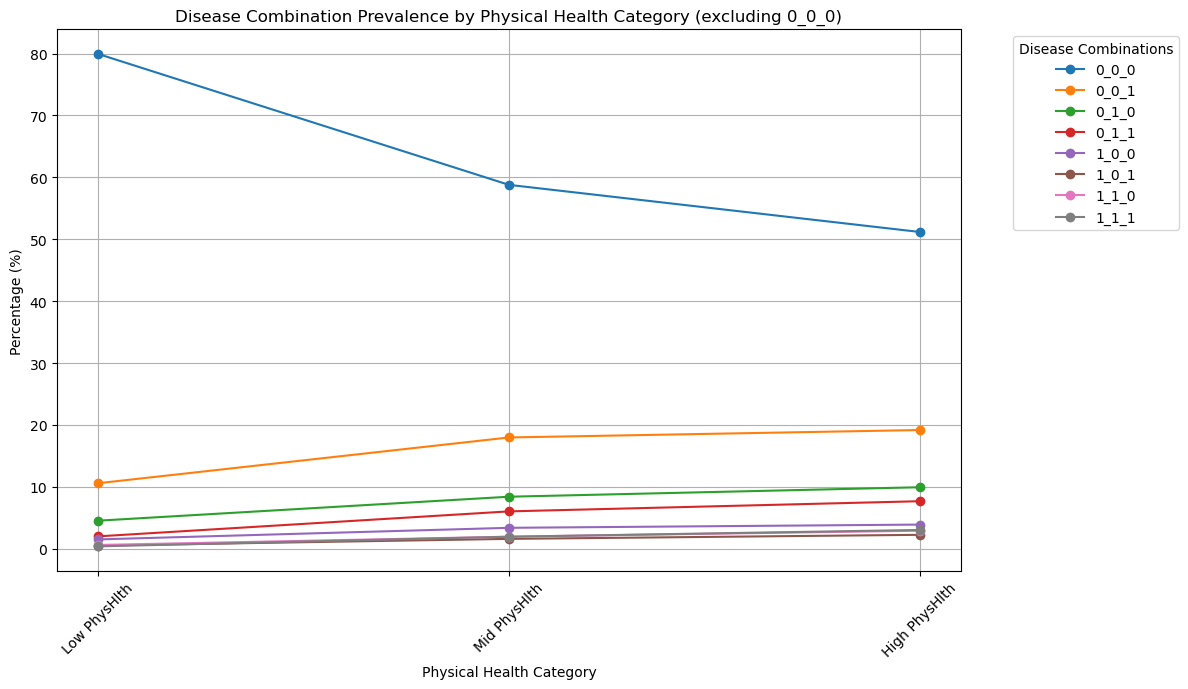

In [100]:
#Group by 'PhysHlth_Category' and 'Disease_Combined', then count instances
disease_counts = HD_data.groupby(['PhysHlth_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each physical health category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

#Check the transformed data
#print(disease_percentages.head())


plt.figure(figsize=(12, 7))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Physical Health Category')
plt.xlabel('Physical Health Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()
#Plot without the 0_0_0

#Filter out rows where 'Disease_Combined' is '0_0_0'
filtered_data = HD_data[HD_data['Combined'] != '00_0']

#Group by 'PhysHlth_Category' and 'Disease_Combined', then count instances
disease_counts = filtered_data.groupby(['PhysHlth_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each physical health category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

#Check the transformed data
print(disease_percentages.head())

#Plotting
plt.figure(figsize=(12, 7))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Physical Health Category (excluding 0_0_0)')
plt.xlabel('Physical Health Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [101]:
#HD_data['Disease_Combined'] = HD_data.apply(lambda row: f"{row['HeartDiseaseorAttack']}_{row['Stroke']}_{row['Diabetes']}", axis=1)

# List of interesting categories for the dropdown
interesting_category = [
    'HighBP', 'HighChol', 'BMI_category', 'PhysActivity', 'Veggies',
    'PhysHlth_category', 'DiffWalk', 'Age_category'
]

def update_visuals(category):
    # Group and count instances for the dataset
    full_counts = HD_data.groupby([category, 'Combined']).size().unstack(fill_value=0)
    
    # Calculate percentages
    full_percentages = full_counts.div(full_counts.sum(axis=1), axis=0) * 100
    
    # Print contingency table for the selected category with formatting
    print(f"Contingency Table for {category} (Including '0_0_0'):")
    display(full_percentages.style.format("{:.2f}%"))

    # First Plot - Including '0_0_0'
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    for column in full_percentages.columns:
        ax1.plot(full_percentages.index, full_percentages[column], marker='o', label=str(column))
    ax1.set_title('With 0_0_0')
    ax1.set_xlabel(category)
    ax1.set_ylabel('Percentage (%)')
    ax1.legend(title='Disease Combinations', loc='best')
    ax1.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Second Plot - Excluding '0_0_0' from display only
    non_zero_percentages = full_percentages.drop(columns=['0_0_0'])  # Drop '0_0_0' for zoom calculation
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    min_value = non_zero_percentages.min().min()  # Find the minimum value across all columns
    max_value = non_zero_percentages.max().max()  # Find the maximum value across all columns
    for column in full_percentages.columns:
        if column != '0_0_0':
            ax2.plot(full_percentages.index, full_percentages[column], marker='o', label=str(column))
    ax2.set_title('Without 0_0_0')
    ax2.set_xlabel(category)
    ax2.set_ylabel('Percentage (%)')
    ax2.set_ylim([min_value - 5, max_value + 5])  # Adjusted zoom level
    ax2.legend(title='Disease Combinations', loc='best')
    ax2.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

dropdown = Dropdown(options=interesting_category)
interact(update_visuals, category=dropdown)

interactive(children=(Dropdown(description='category', options=('HighBP', 'HighChol', 'BMI_category', 'PhysAct…

<function __main__.update_visuals(category)>

In [102]:
# Mutual information and conditional entropy of HeartDisease agaist the highly interested vaiables

def calculate_entropy(series):
    """ Calculate entropy of a pandas series. """
    counts = series.value_counts()
    return entropy(counts)

def calculate_mutual_information(X, Y):
    """ Calculate mutual information between two pandas series. """
    return mutual_info_score(X, Y)

def calculate_conditional_entropy2(X, Y):
    """ Calculate conditional entropy H[X|Y] = H[X] - I[X, Y]. """
    return calculate_entropy(X) - calculate_mutual_information(X, Y)

variables = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 
             'BMI_category', 'Age_category', 'PhysHlth_category']

results = {}

for var in variables:
    mutual_info = calculate_mutual_information(HD_data['HeartDiseaseorAttack'], HD_data[var])
    entropy_X = calculate_entropy(HD_data['HeartDiseaseorAttack'])
    conditional_entropy = calculate_conditional_entropy2(HD_data['HeartDiseaseorAttack'], HD_data[var])
    
    results[var] = {
        'Mutual Information': mutual_info,
        'Entropy': entropy_X,
        'Conditional Entropy': conditional_entropy
    }

results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)



                   Mutual Information   Entropy  Conditional Entropy
HighBP                       0.022137  0.312116             0.289980
HighChol                     0.016285  0.312116             0.295831
PhysActivity                 0.003523  0.312116             0.308593
Veggies                      0.000728  0.312116             0.311388
DiffWalk                     0.018125  0.312116             0.293992
BMI_category                 0.002036  0.312116             0.310080
Age_category                 0.023106  0.312116             0.289011
PhysHlth_category            0.011369  0.312116             0.300747


In [103]:
# Mutual information and conditional entropy of Stroke against the highly interested variables


for var in variables:
    mutual_info = calculate_mutual_information(HD_data['Stroke'], HD_data[var])
    entropy_X = calculate_entropy(HD_data['Stroke'])
    conditional_entropy = calculate_conditional_entropy2(HD_data['Stroke'], HD_data[var])
    
    results[var] = {
        'Mutual Information': mutual_info,
        'Entropy': entropy_X,
        'Conditional Entropy': conditional_entropy
    }

results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)



                   Mutual Information   Entropy  Conditional Entropy
HighBP                       0.008458  0.169754             0.161296
HighChol                     0.004240  0.169754             0.165514
PhysActivity                 0.002164  0.169754             0.167590
Veggies                      0.000775  0.169754             0.168979
DiffWalk                     0.011742  0.169754             0.158012
BMI_category                 0.000399  0.169754             0.169355
Age_category                 0.007192  0.169754             0.162562
PhysHlth_category            0.007316  0.169754             0.162438


In [104]:
# Mutual information and conditional entropy of Diabetes against the highly interested variables

for var in variables:
    mutual_info = calculate_mutual_information(HD_data['Diabetes'], HD_data[var])
    entropy_X = calculate_entropy(HD_data['Diabetes'])
    conditional_entropy = calculate_conditional_entropy2(HD_data['Diabetes'], HD_data[var])
    
    results[var] = {
        'Mutual Information': mutual_info,
        'Entropy': entropy_X,
        'Conditional Entropy': conditional_entropy
    }

results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)



                   Mutual Information   Entropy  Conditional Entropy
HighBP                       0.036836  0.435649             0.398813
HighChol                     0.021963  0.435649             0.413686
PhysActivity                 0.006855  0.435649             0.428794
Veggies                      0.001664  0.435649             0.433985
DiffWalk                     0.020924  0.435649             0.414725
BMI_category                 0.025801  0.435649             0.409848
Age_category                 0.017848  0.435649             0.417801
PhysHlth_category            0.011169  0.435649             0.424480


In [105]:
def calculate_odds_ratio_multiclass(data, feature, target='HeartDiseaseorAttack'):
    categories = data[feature].unique()
    results = {}
    for cat in categories:
        temp_data = data.copy()
        temp_data[feature] = (temp_data[feature] == cat).astype(int)
        table = pd.crosstab(temp_data[feature], temp_data[target])
        try:
            if table.shape == (2, 2):  # Ensure table is 2x2
                tb = Table2x2(table.values)
                oddsratio, ci_low, ci_high = tb.oddsratio, tb.oddsratio_confint()[0], tb.oddsratio_confint()[1]
                results[cat] = {'Odds Ratio': oddsratio, '95% CI Lower': ci_low, '95% CI Upper': ci_high}
            else:
                results[cat] = {'Odds Ratio': np.nan, '95% CI Lower': np.nan, '95% CI Upper': np.nan}
        except Exception as e:
            warnings.warn(f"Error calculating for {feature} - {cat}: {e}")
            results[cat] = {'Odds Ratio': np.nan, '95% CI Lower': np.nan, '95% CI Upper': np.nan}

    return results

In [106]:
# Odds ratio of HeartDisease against interesting variables 
def calculate_odds_ratio_general(data, feature, target='HeartDiseaseorAttack'):
    # Check if the variable is binary or multiclass
    if data[feature].nunique() == 2:
        return calculate_odds_ratio(data, feature, target)
    else:
        return calculate_odds_ratio_multiclass(data, feature, target)

def calculate_odds_ratio(data, feature, target):
    table = pd.crosstab(data[feature], data[target])
    try:
        tb = Table2x2(table.values)
        oddsratio = tb.oddsratio
        ci_low, ci_high = tb.oddsratio_confint()
        return {feature: {'Odds Ratio': oddsratio, '95% CI Lower': ci_low, '95% CI Upper': ci_high}}
    except Exception as e:
        print(f"Error calculating for {feature}: {e}")
        return {feature: {'Odds Ratio': np.nan, '95% CI Lower': np.nan, '95% CI Upper': np.nan}}

variables = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 
             'BMI_category', 'Age_category', 'PhysHlth_category']

all_results = {}

for var in variables:
    result = calculate_odds_ratio_general(HD_data, var)
    all_results.update(result)

# Formatting results for display
results_df = pd.DataFrame.from_dict({k: v for k, v in all_results.items()}, orient='index')
print(results_df)


                Odds Ratio  95% CI Lower  95% CI Upper
HighBP            4.592099      4.454304      4.734155
HighChol          3.589073      3.486710      3.694441
PhysActivity      0.535980      0.521106      0.551280
Veggies           0.727845      0.705155      0.751264
DiffWalk          4.266085      4.147185      4.388395
Severe obesity    1.369759      1.299280      1.444062
Overweight        0.977240      0.950570      1.004658
Normal weight     0.634321      0.613652      0.655686
Obesity           1.366228      1.328470      1.405060
Underweight       1.140479      1.016874      1.279108
Adult             0.483536      0.470180      0.497270
Elder             3.836323      3.730783      3.944849
Young Adult       0.086802      0.078604      0.095854
Mid PhysHlth      2.268001      2.160437      2.380920
Low PhysHlth      0.291860      0.283186      0.300799
High PhysHlth     3.516287      3.397873      3.638828


In [107]:
# Odds ratio of Stroke against the highly interested variables


def calculate_odds_ratio_general(data, feature, target='Stroke'):
    # Check if the variable is binary or multiclass
    if data[feature].nunique() == 2:
        return calculate_odds_ratio(data, feature, target)
    else:
        return calculate_odds_ratio_multiclass(data, feature, target)

def calculate_odds_ratio(data, feature, target):
    table = pd.crosstab(data[feature], data[target])
    try:
        tb = Table2x2(table.values)
        oddsratio = tb.oddsratio
        ci_low, ci_high = tb.oddsratio_confint()
        return {feature: {'Odds Ratio': oddsratio, '95% CI Lower': ci_low, '95% CI Upper': ci_high}}
    except Exception as e:
        print(f"Error calculating for {feature}: {e}")
        return {feature: {'Odds Ratio': np.nan, '95% CI Lower': np.nan, '95% CI Upper': np.nan}}

variables = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 
             'BMI_category', 'Age_category', 'PhysHlth_category']

all_results = {}

for var in variables:
    result = calculate_odds_ratio_general(HD_data, var)
    all_results.update(result)

# Formatting results for display
results_df = pd.DataFrame.from_dict({k: v for k, v in all_results.items()}, orient='index')
print(results_df)





                Odds Ratio  95% CI Lower  95% CI Upper
HighBP            4.016704      3.840637      4.200843
HighChol          2.583564      2.479247      2.692270
PhysActivity      0.491360      0.471747      0.511790
Veggies           0.624904      0.597490      0.653577
DiffWalk          5.239774      5.033416      5.454592
Severe obesity    1.297770      1.199742      1.403808
Overweight        0.954101      0.915680      0.994135
Normal weight     0.782704      0.746827      0.820304
Obesity           1.172847      1.124411      1.223369
Underweight       1.681404      1.457819      1.939281
Adult             0.581524      0.558289      0.605726
Elder             2.939809      2.823512      3.060896
Young Adult       0.145731      0.129075      0.164537
Mid PhysHlth      2.434941      2.277704      2.603033
Low PhysHlth      0.249765      0.239523      0.260445
High PhysHlth     4.046925      3.864243      4.238243


In [108]:
# Odds ratio of Diabetes against the highly interested variables

def calculate_odds_ratio_general(data, feature, target='Diabetes'):
    # Check if the variable is binary or multiclass
    if data[feature].nunique() == 2:
        return calculate_odds_ratio(data, feature, target)
    else:
        return calculate_odds_ratio_multiclass(data, feature, target)

def calculate_odds_ratio(data, feature, target):
    table = pd.crosstab(data[feature], data[target])
    try:
        tb = Table2x2(table.values)
        oddsratio = tb.oddsratio
        ci_low, ci_high = tb.oddsratio_confint()
        return {feature: {'Odds Ratio': oddsratio, '95% CI Lower': ci_low, '95% CI Upper': ci_high}}
    except Exception as e:
        print(f"Error calculating for {feature}: {e}")
        return {feature: {'Odds Ratio': np.nan, '95% CI Lower': np.nan, '95% CI Upper': np.nan}}

variables = ['HighBP', 'HighChol', 'PhysActivity', 'Veggies', 'DiffWalk', 
             'BMI_category', 'Age_category', 'PhysHlth_category']

all_results = {}

for var in variables:
    result = calculate_odds_ratio_general(HD_data, var)
    all_results.update(result)

# Formatting results for display
results_df = pd.DataFrame.from_dict({k: v for k, v in all_results.items()}, orient='index')
print(results_df)


                Odds Ratio  95% CI Lower  95% CI Upper
HighBP            4.781584      4.668347      4.897569
HighChol          3.241590      3.169393      3.315432
PhysActivity      0.495664      0.484494      0.507092
Veggies           0.680355      0.663278      0.697871
DiffWalk          3.695512      3.608064      3.785079
Severe obesity    3.391068      3.269475      3.517182
Overweight        0.713531      0.697308      0.730132
Normal weight     0.303143      0.293587      0.313011
Obesity           2.275234      2.225863      2.325701
Underweight       0.356245      0.308266      0.411692
Adult             0.798245      0.781306      0.815551
Elder             2.229905      2.182227      2.278624
Young Adult       0.180551      0.171116      0.190506
Mid PhysHlth      2.120332      2.033536      2.210833
Low PhysHlth      0.353619      0.344532      0.362945
High PhysHlth     2.865237      2.779644      2.953465
